In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade pip

In [ ]:
# Installing pmdarima to implement Auto-ARIMA
!pip install pmdarima
!pip install statsmodels
from pmdarima import auto_arima

import statsmodels.api as sm

In [ ]:
import pandas as pd
# to find hyperparameters automatically
from pmdarima import auto_arima

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pandas_datareader import DataReader
from pandas_datareader import data as pdr

In [ ]:
from datetime import datetime

## Case 1: For large dataset

In [ ]:
start = "2007-01-01"
end = "2023-07-31"

# Convert start and end dates to datetime objects
start_date = datetime.strptime(start, "%Y-%m-%d")
end_date = datetime.strptime(end, "%Y-%m-%d")

# Set up the data reader with Yahoo Finance
yf.pdr_override()

In [ ]:
# Making an array for 8 different stock prices from tech industry
# AAPL - Apple
# MSFT - Microsoft
# AMZN - Amazon
# NFLX - Netflix
# INFY - Infosys
# ADBE - Adobe
# META - Facebook (Meta)
# GOOGL - Google (Class A - gives voting rights)
# TSLA - Tesla Inc.
# NVDA - NVIDIA Corporation

stock_types = ["AAPL", "MSFT", "AMZN", "NFLX", "INFY", "ADBE", "GOOGL", "NVDA"]

In [ ]:
stock_dict = {}
for stock in stock_types:
  stock_dict[stock] = None

In [ ]:
for stock in stock_dict:
  # Fetch the data using DataReader
  df = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
  df = df.reset_index()

  if df is not None:
    stock_dict[stock] = df
    print(stock + "-" )
    print(df.head())  # Display the first few rows of the loaded data

[*********************100%%**********************]  1 of 1 completed
AAPL-
        Date      Open      High       Low     Close  Adj Close      Volume
0 2007-01-03  3.081786  3.092143  2.925000  2.992857   2.540327  1238319600
1 2007-01-04  3.001786  3.069643  2.993571  3.059286   2.596711   847260400
2 2007-01-05  3.063214  3.078571  3.014286  3.037500   2.578220   834741600
3 2007-01-08  3.070000  3.090357  3.045714  3.052500   2.590951   797106800
4 2007-01-09  3.087500  3.320714  3.041071  3.306071   2.806181  3349298400
[*********************100%%**********************]  1 of 1 completed
MSFT-
        Date       Open       High        Low      Close  Adj Close    Volume
0 2007-01-03  29.910000  30.250000  29.400000  29.860001  21.480505  76935100
1 2007-01-04  29.700001  29.969999  29.440001  29.809999  21.444536  45774500
2 2007-01-05  29.629999  29.750000  29.450001  29.639999  21.322247  44607200
3 2007-01-08  29.650000  30.100000  29.530001  29.930000  21.530861  50220200
4 20

### Splliting training and Testing Data

In [ ]:
stock_dict["AAPL"].shape[0]

4171

In [ ]:
import math

In [ ]:
# Calculating training length for splitting later on
training_len = math.ceil(0.8 * stock_dict["AAPL"].shape[0])
training_len

3337

In [ ]:
# Splitting Train and Test Dataset
stock_training_dict = {}
stock_testing_dict = {}

for stock in stock_dict:
  stock_training_dict[stock] = stock_dict[stock].iloc[0:training_len, : ]
  stock_testing_dict[stock] = stock_dict[stock].iloc[training_len: , : ]

In [ ]:
stock_training_dict["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,3.081786,3.092143,2.925000,2.992857,2.540327,1238319600
1,2007-01-04,3.001786,3.069643,2.993571,3.059286,2.596711,847260400
2,2007-01-05,3.063214,3.078571,3.014286,3.037500,2.578220,834741600
3,2007-01-08,3.070000,3.090357,3.045714,3.052500,2.590951,797106800
4,2007-01-09,3.087500,3.320714,3.041071,3.306071,2.806181,3349298400
...,...,...,...,...,...,...,...
3332,2020-03-30,62.685001,63.880001,62.349998,63.702499,62.290260,167976400
3333,2020-03-31,63.900002,65.622498,63.000000,63.572498,62.163151,197002000
3334,2020-04-01,61.625000,62.180000,59.782501,60.227501,58.892300,176218400
3335,2020-04-02,60.084999,61.287498,59.224998,61.232498,59.875023,165934000


In [ ]:
stock_testing_dict["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
3337,2020-04-06,62.724998,65.777496,62.345001,65.617500,64.162827,201820400
3338,2020-04-07,67.699997,67.925003,64.750000,64.857498,63.419651,202887200
3339,2020-04-08,65.684998,66.842499,65.307503,66.517502,65.042862,168895200
3340,2020-04-09,67.175003,67.517502,66.175003,66.997498,65.512215,161834800
3341,2020-04-13,67.077499,68.425003,66.457497,68.312500,66.798065,131022800
...,...,...,...,...,...,...,...
4166,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.490067,45377800
4167,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887,37283200
4168,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701,47471900
4169,2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427,47460200


In [ ]:
for stock in stock_training_dict:
  print(stock + "-")
  print(stock_training_dict[stock].isna().sum())
  print()

AAPL-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

MSFT-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

AMZN-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

NFLX-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

INFY-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

ADBE-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

GOOGL-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

NVDA-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
stock_models = {}

for stock in stock_training_dict:

  # Find the optimal (p, d, q) values using auto_arima
  model = auto_arima(stock_training_dict[stock]['Close'], seasonal=False, trace=True)

  # Printing optimal parameters
  print(stock, " - Chosen (p, d, q) values:", model.order)

  # Fit the ARIMA model with the chosen parameters
  p, d, q = model.order
  arima_model = sm.tsa.ARIMA(stock_training_dict[stock]['Close'], order=(p, d, q))
  arima_fit = arima_model.fit()

  stock_models[stock] = arima_fit

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5683.853, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5786.450, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5678.596, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5683.044, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5787.425, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5680.577, Time=0.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5680.580, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5682.544, Time=1.53 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5680.892, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 7.069 seconds
AAPL  - Chosen (p, d, q) values: (1, 1, 0)
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.93 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=14173.223, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=12293.839, Time=0.49 sec
 ARI

In [ ]:
predictions_dict = {}

In [ ]:
for stock in stock_models:

  # Make forecasts using the fitted ARIMA model
  forecast_steps = len(stock_testing_dict[stock])  # Adjust the number of forecast steps as needed
  forecasts = stock_models[stock].forecast(steps=forecast_steps)

  predictions_dict[stock] = forecasts

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse_dict = {}

In [ ]:
for stock in predictions_dict:
  rmse_dict[stock] = np.sqrt(mean_squared_error(predictions_dict[stock], stock_testing_dict[stock]["Close"]))

In [ ]:
rmse_dict

{'AAPL': 84.74726361006219,
 'MSFT': 315.9254550937203,
 'AMZN': 52.504579701205216,
 'NFLX': 144.14509602383234,
 'INFY': 11.231970117838435,
 'ADBE': 2526.6292650105484,
 'GOOGL': 57.88132130951255,
 'NVDA': 152.16795781468358}

AAPL-


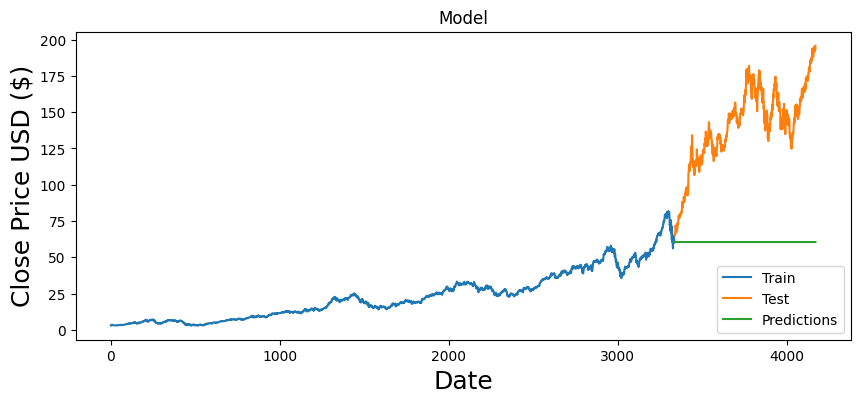

MSFT-


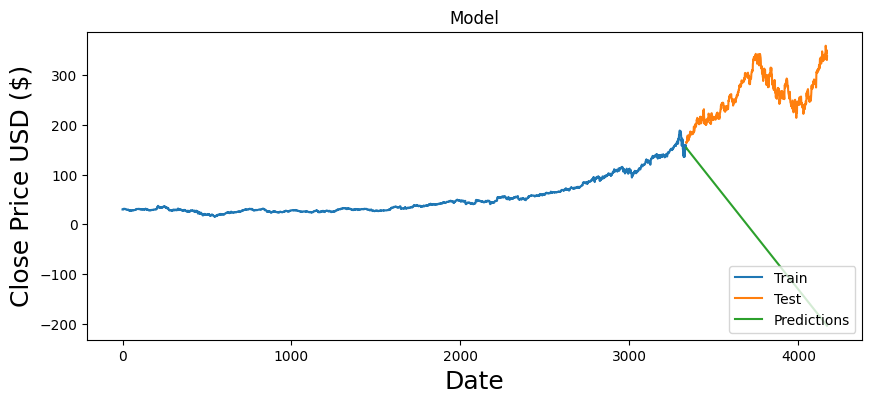

AMZN-


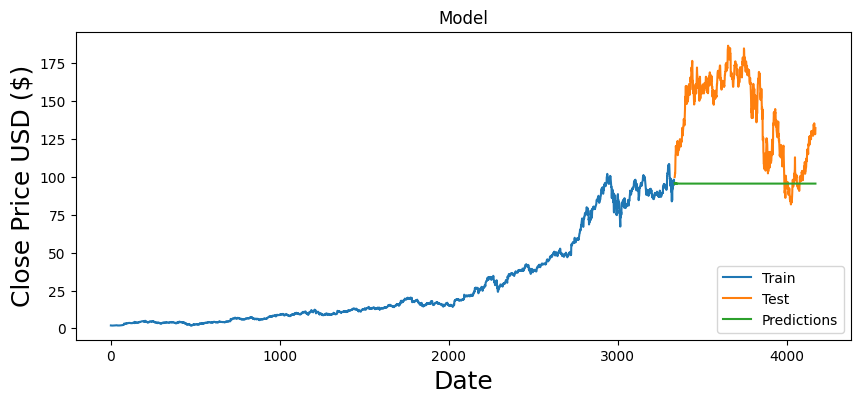

NFLX-


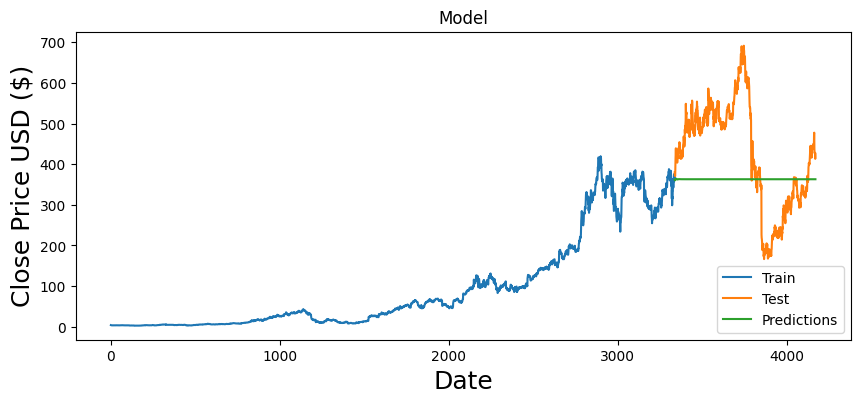

INFY-


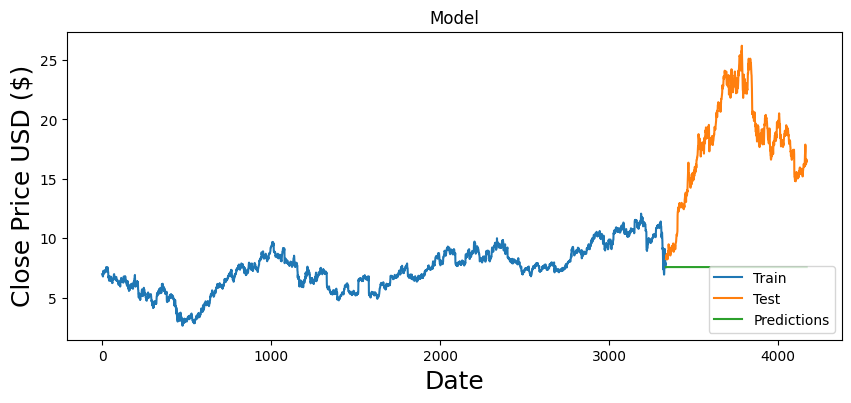

ADBE-


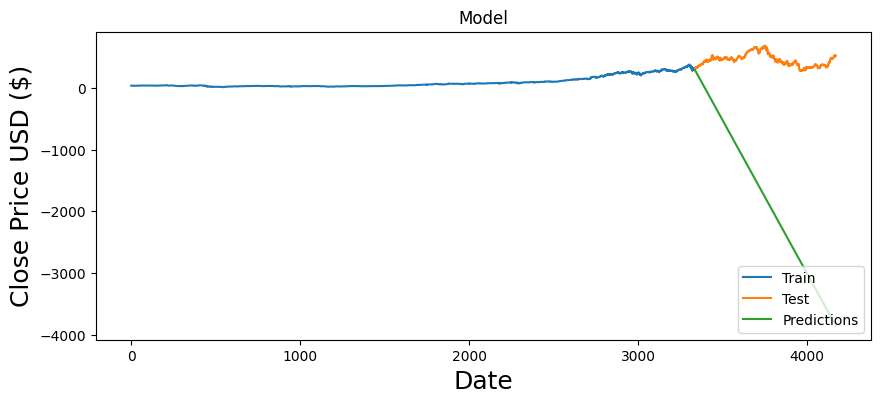

GOOGL-


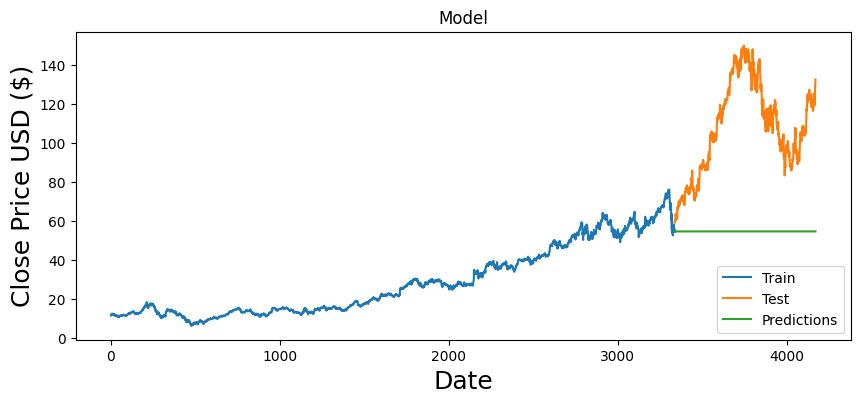

NVDA-


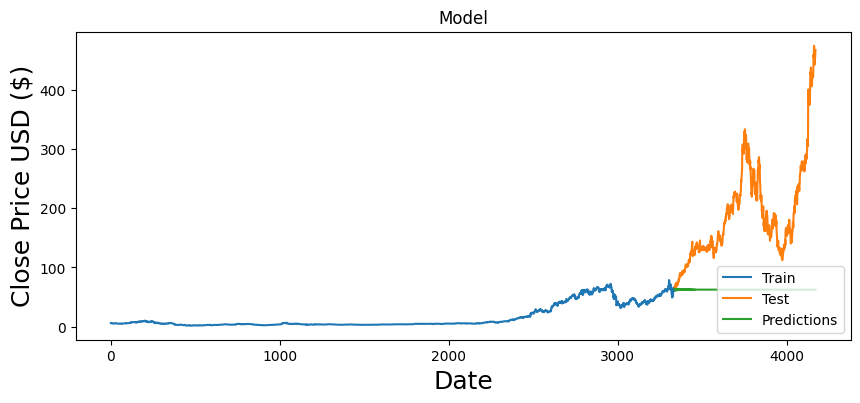

In [ ]:
for stock in predictions_dict:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict[stock].filter(['Close'])

  #Plot/Create the data for the graph
  train = data[:training_len]
  valid = data[training_len:]
  valid['Predictions'] = predictions_dict[stock]

  #Visualize the data
  print(stock + "-")
  plt.figure(figsize=(10,4))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

In [ ]:
mae_dict = {}
mape_dict = {}

for stock in predictions_dict:
    # Calculate MAE
    mae = np.mean(np.abs(predictions_dict[stock] - stock_testing_dict[stock]["Close"]))
    mae_dict[stock] = mae

    # Calculate MAPE
    actual = stock_testing_dict[stock]["Close"]
    mape = np.mean(np.abs((predictions_dict[stock] - actual) / actual)) * 100
    mape_dict[stock] = mape

# Print MAE and MAPE for each stock
for stock in predictions_dict:
    print(f"{stock} - MAE: {mae_dict[stock]:.2f}, MAPE: {mape_dict[stock]:.2f}%")

AAPL - MAE: 80.25, MAPE: 54.92%
MSFT - MAE: 285.43, MAPE: 105.17%
AMZN - MAE: 45.40, MAPE: 29.60%
NFLX - MAE: 124.04, MAPE: 31.45%
INFY - MAE: 10.46, MAPE: 55.09%
ADBE - MAE: 2238.67, MAPE: 530.11%
GOOGL - MAE: 53.01, MAPE: 46.55%
NVDA - MAE: 128.42, MAPE: 61.46%


## Case 2: For small dataset

In [ ]:
start = "2023-01-01"
end = "2023-07-31"

# Convert start and end dates to datetime objects
start_date = datetime.strptime(start, "%Y-%m-%d")
end_date = datetime.strptime(end, "%Y-%m-%d")

# Set up the data reader with Yahoo Finance
yf.pdr_override()

In [ ]:
stock_dict_small = {}
for stock in stock_types:
  stock_dict_small[stock] = None

In [ ]:
for stock in stock_dict_small:
  # Fetch the data using DataReader
  df = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
  df = df.reset_index()

  if df is not None:
    stock_dict_small[stock] = df
    print(stock + "-" )
    print(df.head())  # Display the first few rows of the loaded data

[*********************100%%**********************]  1 of 1 completed
AAPL-
        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  130.279999  130.899994  124.169998  125.070000  124.538658   
1 2023-01-04  126.889999  128.660004  125.080002  126.360001  125.823189   
2 2023-01-05  127.129997  127.769997  124.760002  125.019997  124.488869   
3 2023-01-06  126.010002  130.289993  124.889999  129.619995  129.069336   
4 2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597076   

      Volume  
0  112117500  
1   89113600  
2   80962700  
3   87754700  
4   70790800  
[*********************100%%**********************]  1 of 1 completed
MSFT-
        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  243.080002  245.750000  237.399994  239.580002  237.956329   
1 2023-01-04  232.279999  232.869995  225.960007  229.100006  227.547348   
2 2023-01-05  227.199997  227.550003  221.759995  222.309998  220.803375   

## Splliting training and Testing Data

In [ ]:
import math

In [ ]:
training_len_small = math.ceil(0.8 * stock_dict_small["AAPL"].shape[0])
training_len_small

115

In [ ]:
stock_training_dict_small = {}
stock_testing_dict_small = {}

for stock in stock_dict_small:
  stock_training_dict_small[stock] = stock_dict_small[stock].iloc[0:training_len_small, : ]
  stock_testing_dict_small[stock] = stock_dict_small[stock].iloc[training_len_small: , : ]

In [ ]:
stock_training_dict_small["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...
110,2023-06-12,181.270004,183.889999,180.970001,183.789993,183.542145,54274900
111,2023-06-13,182.800003,184.149994,182.440002,183.309998,183.062790,54929100
112,2023-06-14,183.369995,184.389999,182.020004,183.949997,183.701935,57462900
113,2023-06-15,183.960007,186.520004,183.779999,186.009995,185.759155,65433200


In [ ]:
stock_training_dict_small["AAPL"].describe()

,Open,High,Low,Close,Adj Close,Volume
count,115.000000,115.000000,115.000000,115.000000,115.000000,1.150000e+02
mean,158.314175,160.067478,157.133392,158.807826,158.377964,6.372167e+07
std,14.971595,14.714957,15.095077,14.895308,14.985516,1.865030e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.726670e+07
25%,148.454994,151.025002,147.529999,149.154999,148.748100,5.087930e+07
50%,159.300003,161.050003,157.850006,159.279999,158.845490,5.833730e+07
75%,171.034996,172.674995,170.470001,171.665001,171.315033,6.976555e+07
max,186.729996,186.990005,184.270004,186.009995,185.759155,1.543573e+08


In [ ]:
stock_testing_dict_small["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
115,2023-06-20,184.410004,186.100006,184.410004,185.009995,184.760498,49799100
116,2023-06-21,184.899994,185.410004,182.589996,183.960007,183.711929,49515700
117,2023-06-22,183.740005,187.050003,183.669998,187.000000,186.747818,51245300
118,2023-06-23,185.550003,187.559998,185.009995,186.679993,186.428238,53079300
119,2023-06-26,186.830002,188.050003,185.229996,185.270004,185.020157,48088700
120,2023-06-27,185.889999,188.389999,185.669998,188.059998,187.806381,50730800
121,2023-06-28,187.929993,189.899994,187.600006,189.250000,188.994781,51216800
122,2023-06-29,189.080002,190.070007,188.940002,189.589996,189.334320,46347300
123,2023-06-30,191.630005,194.479996,191.259995,193.970001,193.708420,85069600
124,2023-07-03,193.779999,193.880005,191.759995,192.460007,192.200470,31458200


In [ ]:
stock_models_small = {}

for stock in stock_training_dict_small:

  # Find the optimal (p, d, q) values using auto_arima
  model = auto_arima(stock_training_dict_small[stock]['Close'], seasonal=False, trace=True)

  # Printing optimal parameters
  print(stock, " - Chosen (p, d, q) values:", model.order)

  # Fit the ARIMA model with the chosen parameters
  p, d, q = model.order
  arima_model = sm.tsa.ARIMA(stock_training_dict_small[stock]['Close'], order=(p, d, q))
  arima_fit = arima_model.fit()

  stock_models_small[stock] = arima_fit

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=494.305, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=490.179, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=492.047, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=492.004, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=495.483, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=493.966, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.335 seconds
AAPL  - Chosen (p, d, q) values: (0, 1, 0)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=692.230, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=693.354, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=692.490, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=693.947, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=690.467, Time=0.07 sec
 ARIMA(2,1,1)(0,0,

In [ ]:
predictions_dict_small = {}

In [ ]:
for stock in stock_models_small:

  # Make forecasts using the fitted ARIMA model
  forecast_steps = len(stock_testing_dict_small[stock])  # Adjust the number of forecast steps as needed
  forecasts = stock_models_small[stock].forecast(steps=forecast_steps)

  predictions_dict_small[stock] = forecasts

In [ ]:
rmse_dict_small = {}

In [ ]:
for stock in predictions_dict_small:
  rmse_dict_small[stock] = np.sqrt(mean_squared_error(predictions_dict_small[stock], stock_testing_dict_small[stock]["Close"]))

In [ ]:
rmse_dict_small

{'AAPL': 6.623225065174472,
 'MSFT': 7.045616318731922,
 'AMZN': 4.8698947807564315,
 'NFLX': 15.475440611413049,
 'INFY': 0.7645259084653958,
 'ADBE': 19.519232711651156,
 'GOOGL': 4.057395406442999,
 'NVDA': 22.971701518186244}

In [ ]:
stock_dict_small["AAPL"]["Close"]

0      125.070000
1      126.360001
2      125.019997
3      129.619995
4      130.149994
          ...    
138    192.750000
139    193.619995
140    194.500000
141    193.220001
142    195.830002
Name: Close, Length: 143, dtype: float64

In [ ]:
stock_training_dict_small["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...
110,2023-06-12,181.270004,183.889999,180.970001,183.789993,183.542145,54274900
111,2023-06-13,182.800003,184.149994,182.440002,183.309998,183.062790,54929100
112,2023-06-14,183.369995,184.389999,182.020004,183.949997,183.701935,57462900
113,2023-06-15,183.960007,186.520004,183.779999,186.009995,185.759155,65433200


In [ ]:
stock_testing_dict_small["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
115,2023-06-20,184.410004,186.100006,184.410004,185.009995,184.760498,49799100
116,2023-06-21,184.899994,185.410004,182.589996,183.960007,183.711929,49515700
117,2023-06-22,183.740005,187.050003,183.669998,187.000000,186.747818,51245300
118,2023-06-23,185.550003,187.559998,185.009995,186.679993,186.428238,53079300
119,2023-06-26,186.830002,188.050003,185.229996,185.270004,185.020157,48088700
120,2023-06-27,185.889999,188.389999,185.669998,188.059998,187.806381,50730800
121,2023-06-28,187.929993,189.899994,187.600006,189.250000,188.994781,51216800
122,2023-06-29,189.080002,190.070007,188.940002,189.589996,189.334320,46347300
123,2023-06-30,191.630005,194.479996,191.259995,193.970001,193.708420,85069600
124,2023-07-03,193.779999,193.880005,191.759995,192.460007,192.200470,31458200


AAPL-


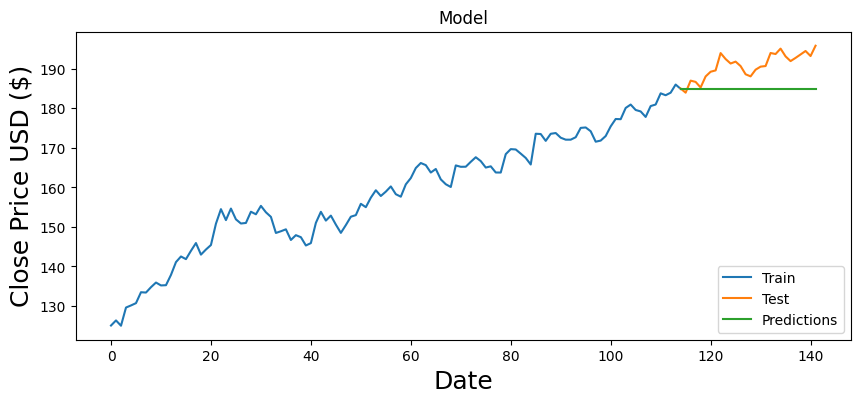

MSFT-


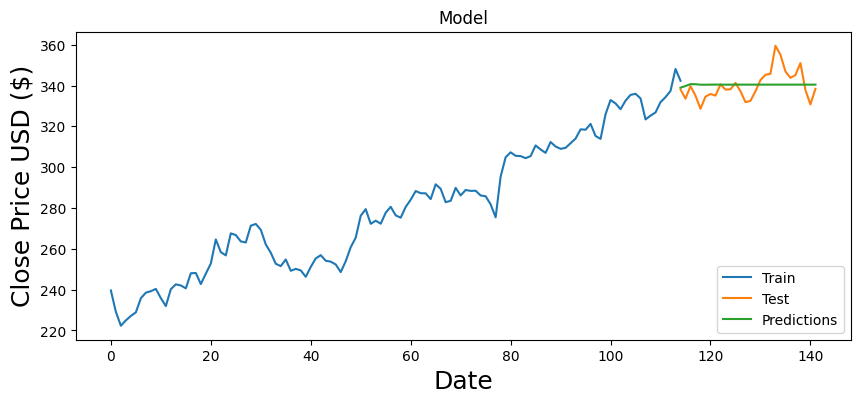

AMZN-


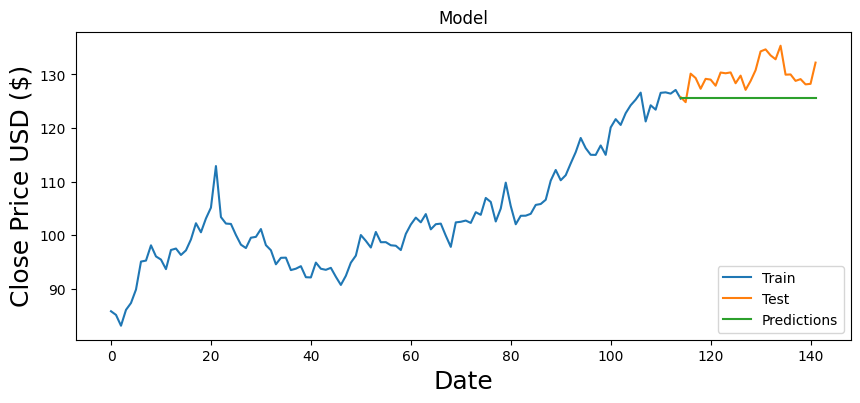

NFLX-


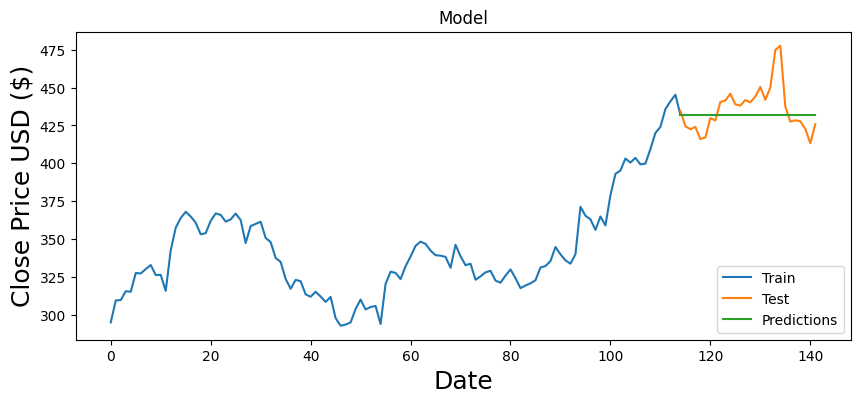

INFY-


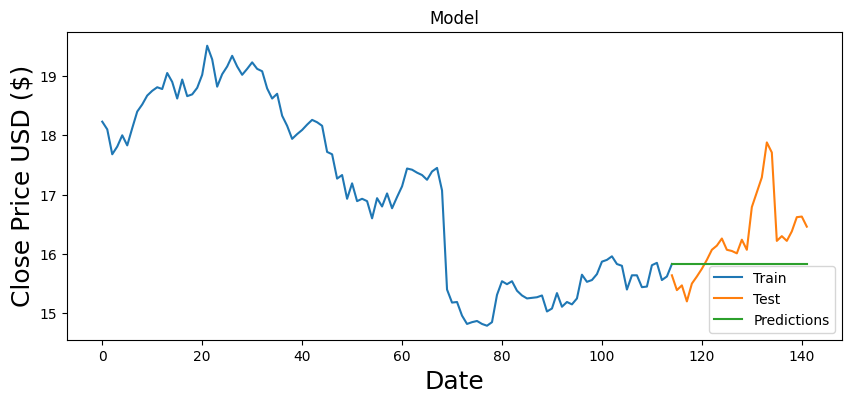

ADBE-


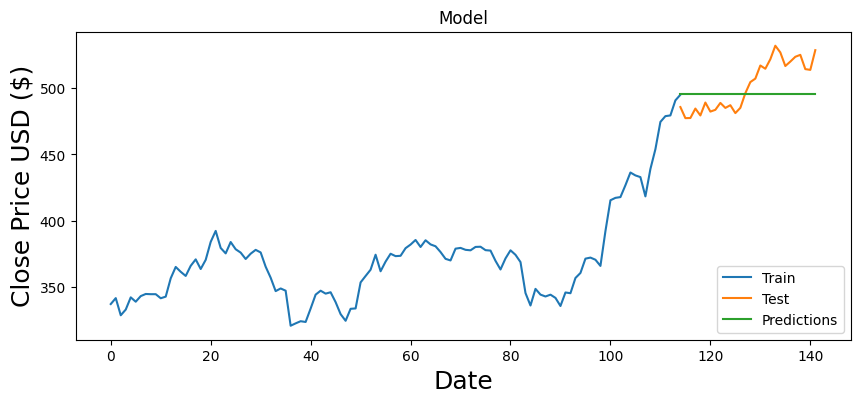

GOOGL-


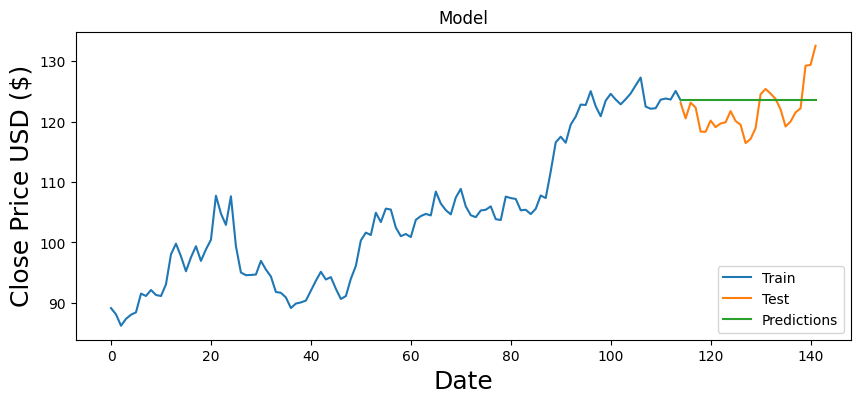

NVDA-


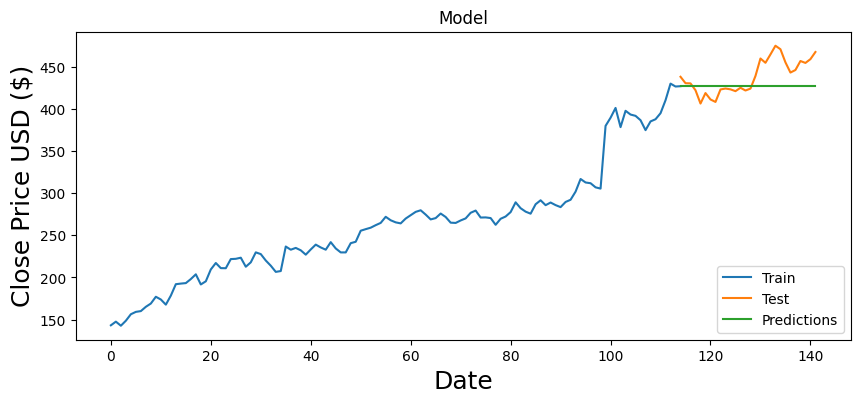

In [ ]:
for stock in predictions_dict_small:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict_small[stock].filter(['Close'])

  #Plot/Create the data for the graph
  train = data[:training_len_small]
  valid = data[training_len_small:]

  valid['Predictions'] = predictions_dict_small[stock]

  # New start index
  new_start_index = 114

  # Calculate the new end index based on your requirement
  new_end_index = new_start_index + len(valid) - 1

  # Change the start index and end index of the DataFrame index
  valid.index = range(new_start_index, new_end_index + 1)

  #Visualize the data
  print(stock + "-")
  plt.figure(figsize=(10,4))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

In [ ]:
mae_dict_small = {}
mape_dict_small = {}

for stock in predictions_dict_small:
    # Calculate MAE
    mae = np.mean(np.abs(predictions_dict_small[stock] - stock_testing_dict_small[stock]["Close"]))
    mae_dict_small[stock] = mae

    # Calculate MAPE
    actual = stock_testing_dict_small[stock]["Close"]
    mape = np.mean(np.abs((predictions_dict_small[stock] - actual) / actual)) * 100
    mape_dict_small[stock] = mape

# Print MAE and MAPE for each stock
for stock in predictions_dict_small:
    print(f"{stock} - MAE: {mae_dict_small[stock]:.2f}, MAPE: {mape_dict_small[stock]:.2f}%")

AAPL - MAE: 5.88, MAPE: 3.06%
MSFT - MAE: 5.55, MAPE: 1.62%
AMZN - MAE: 4.24, MAPE: 3.23%
NFLX - MAE: 11.66, MAPE: 2.63%
INFY - MAE: 0.58, MAPE: 3.46%
ADBE - MAE: 17.35, MAPE: 3.41%
GOOGL - MAE: 3.41, MAPE: 2.80%
NVDA - MAE: 18.15, MAPE: 4.03%
